In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Neural Network

In [2]:
class NeuralNetwork_Nf:
    
    def __init__(self, input_size, hidden_layer_neurons, output_size):
        np.random.seed(2)
        
        self.number_of_layers = len(hidden_layer_neurons) + 2                           # hidden + input + output
        self.input_size = input_size
        self.hidden_layers_neurons = hidden_layer_neurons                               # neurons per hidden layer
        self.output_size = output_size
        self.layers = [input_size] + hidden_layer_neurons + [output_size]
        self.weights = [np.random.randn(self.layers[i], self.layers[i+1]) for i in range(self.number_of_layers - 1)]
        self.biases = [np.ones((1, layer)) for layer in self.layers[1:]]
        self.loss_list = []
        self.activations = None
    
    
    def __activation__(self, x):
        if self.activation == 'relu':
            return np.maximum(0, x)
        elif self.activation == 'tanh':
            return np.tanh(x)
        else:
            return x  

    def __activation_deriv__(self, x):
        if self.activation == 'relu':
            return x * (x > 0)
        elif self.activation == 'tanh':
            return 1 - np.tanh(x)**2
        else:
            return np.ones_like(x)
        
        
    def __compute_loss__(self, X, y):
        final_loss = 0
        
        for x_element, y_element in zip(X, y):
            x_element = x_element.reshape(self.input_size, 1)
            y_element = y_element.reshape(self.output_size, 1)
            output_forward = self.__forward__(x_element)
            
            loss = 0.5 * np.sum(( y_element - output_forward) ** 2)
            final_loss += loss
            
        self.loss_list.append(final_loss)
            
    
    def __forward__(self, X):
        self.activations = [X]
        
        for index in range(len(self.weights)):
            weight = self.weights[index]
            bias = self.biases[index]
            
            z = np.matmul(weight.T, self.activations[-1]) + bias.T
            a = self.__activation__(z) if index != len(self.weights) - 1 else z  
            
            self.activations.append(a)
            
        return self.activations[-1]
    
    
    def __backward__(self, y):
        deltas = [None] * len(self.weights)                 
        delta =  self.activations[-1] - y
        
        deltas[-1] = delta * self.__activation_deriv__(self.activations[-1])

        for i in reversed(range(len(deltas) - 1)):
            error = np.matmul(self.weights[i+1], deltas[i+1])   
            deltas[i] = error * self.__activation_deriv__(self.activations[i+1])


        for i in range(len(self.weights)):
            self.weights[i] -= np.matmul(self.activations[i], deltas[i].T) * self.learning_rate 
            self.biases[i] -= np.sum(deltas[i], axis=0, keepdims=True) * self.learning_rate
            
        
    def train(self, X, y, learning_rate, epochs, activation=None):
        self.learning_rate = learning_rate
        self.activation = activation
        
        for epoch in range(epochs):
            for x_element, y_element in zip(X, y):
                x_element = x_element.reshape(self.input_size, 1)
                y_element = y_element.reshape(self.output_size, 1)
                self.__forward__(x_element)
                self.__backward__(y_element)
            self.__compute_loss__(X, y)
            
        return self.loss_list, self.weights, self.biases
            
    
    def test_model(self, X):
        output = self.__forward__(X)
        output = np.round(output, 4).reshape(self.output_size).tolist()

        return output
                
    
    def describe_model(self):
        """ for testing purpose """
        
        print("Number of Layers: ", self.number_of_layers)
        print("Input Size: ", self.input_size)
        print("Output Size: ", self.output_size)
        print("Weights Shape: \n")
        for w in self.weights:
            print(w.shape)
        print("Biases Shape: \n")
        for b in self.biases:
            print(b.shape)

In [3]:
class NeuralNetwork_Ng:
    
    def __init__(self, input_size, hidden_layer_neurons, output_size):
        np.random.seed(2)
        
        self.number_of_layers = len(hidden_layer_neurons) + 2                           # hidden + input + output
        self.input_size = input_size
        self.hidden_layers_neurons = hidden_layer_neurons                               # neurons per hidden layer
        self.output_size = output_size
        self.layers = [input_size] + hidden_layer_neurons + [output_size]
        self.weights = [np.random.randn(self.layers[i], self.layers[i+1]) for i in range(self.number_of_layers - 1)]
        self.biases = [np.ones((1, layer)) for layer in self.layers[1:]]
        self.loss_list = []
        self.activations = None
    
    
    def __activation__(self, x):
        if self.activation == 'relu':
            return np.maximum(0, x)
        elif self.activation == 'tanh':
            return np.tanh(x)
        else:
            return x  # No activation function for the last layer

    def __activation_deriv__(self, x):
        if self.activation == 'relu':
            return x * (x > 0)
        elif self.activation == 'tanh':
            return 1 - np.tanh(x)**2
        else:
            return np.ones_like(x)
        
        
    def __compute_loss__(self, X, y):
        final_loss = 0
        
        for x_element, y_element in zip(X, y):
            x_element = x_element.reshape(self.input_size, 1)
            y_element = y_element.reshape(self.output_size, 1)
            output_forward = self.__forward__(x_element)
            
            loss = 0.5 * np.sum(( y_element - output_forward) ** 2)
            final_loss += loss
            
        self.loss_list.append(final_loss)
            
    
    def __forward__(self, X):
        self.activations = [X]
        
        for index in range(len(self.weights)):
            weight = self.weights[index]
            bias = self.biases[index]
            
            z = np.matmul(weight.T, self.activations[-1]) + bias.T
            a = self.__activation__(z) if index != len(self.weights) - 1 else z  
            
            self.activations.append(a)
            
        return self.activations[-1]
    
    
    def __backward__(self, y):
        deltas = [None] * len(self.weights)                 
        delta =  self.activations[-1] - y
        
        deltas[-1] = delta * np.ones_like(self.activations[-1])

        for i in reversed(range(len(deltas) - 1)):
            error = np.matmul(self.weights[i+1], deltas[i+1])   
            deltas[i] = error * self.__activation_deriv__(self.activations[i+1])


        for i in range(len(self.weights)):
            self.weights[i] -= np.matmul(self.activations[i], deltas[i].T) * self.learning_rate 
            self.biases[i] -= np.sum(deltas[i], axis=0, keepdims=True) * self.learning_rate
            
        
    def train(self, X, y, learning_rate, epochs, activation=None):
        self.learning_rate = learning_rate
        self.activation = activation
        
        for epoch in range(epochs):
            for x_element, y_element in zip(X, y):
                x_element = x_element.reshape(self.input_size, 1)
                y_element = y_element.reshape(self.output_size, 1)
                self.__forward__(x_element)
                self.__backward__(y_element)
            self.__compute_loss__(X, y)
            
        return self.loss_list, self.weights, self.biases
            
    
    def test_model(self, X):
        output = self.__forward__(X)
        output = np.round(output, 4).reshape(self.output_size).tolist()

        return output
                
    
    def describe_model(self):
        """ for testing purpose """
        
        print("Number of Layers: ", self.number_of_layers)
        print("Input Size: ", self.input_size)
        print("Output Size: ", self.output_size)
        print("Weights Shape: \n")
        for w in self.weights:
            print(w.shape)
        print("Biases Shape: \n")
        for b in self.biases:
            print(b.shape)

# Plant

In [4]:
def f(y):
    return y/(1+y**2)

def g(u):
    return u**3

# Generate Data

In [5]:
distance_nf = 0.1
distance_ng = 0.1

u_data = np.arange(-2, 2, distance_ng)
y_data = np.arange(-10, 10, distance_nf)

f_data = f(y_data)
g_data = g(u_data)

# Plot Figures

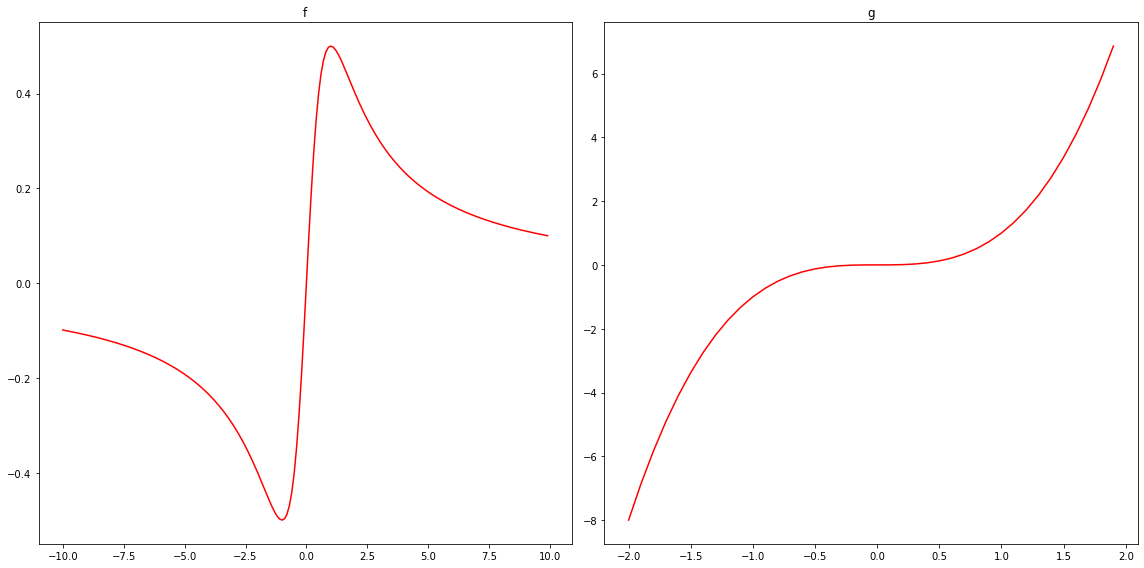

In [6]:
plt.figure(figsize=(16, 8))  

plt.subplot(1, 2, 1)
plt.plot(y_data, f_data, 'red')
plt.title('f')

plt.subplot(1, 2, 2) 
plt.plot(u_data, g_data, 'red')  
plt.title('g')

plt.tight_layout()
plt.savefig('./Images/Example_3_inputs.pdf')
plt.show()

# Neural Network Models

### Model Nf and Model Ng

In [7]:
np.random.seed(7)


# Model Nf Starts Here
input_size = 1
hidden_layer_neurons = [20, 10]
output_size = 1
learning_rate_nf = 0.1
epochs_nf = 500

X = y_data.reshape(y_data.shape[0], 1)
y = f_data.reshape(f_data.shape[0], 1)

model_Nf = NeuralNetwork_Nf(input_size, hidden_layer_neurons, output_size)
loss, weights, biases = model_Nf.train(X, y, learning_rate_nf, epochs_nf, 'tanh')

output_nf = []

for index in range(len(X)):
    x_ele = X[index]
    x_ele = x_ele.reshape(input_size, 1)
    output = model_Nf.test_model(x_ele)
    output_nf.append(output)


# Model Ng Starts Here
input_size = 1
hidden_layer_neurons = [20, 10]
output_size = 1
learning_rate_ng = 0.001
epochs_ng = 500

X = u_data.reshape(u_data.shape[0], 1)
y = g_data.reshape(g_data.shape[0], 1)

model_Ng = NeuralNetwork_Ng(input_size, hidden_layer_neurons, output_size)
loss, weights, biases = model_Ng.train(X, y, learning_rate_ng, epochs_ng, 'tanh')

output_ng = []

for index in range(len(X)):
    x_ele = X[index]
    x_ele = x_ele.reshape(input_size, 1)
    output = model_Ng.test_model(x_ele)
    output_ng.append(output)

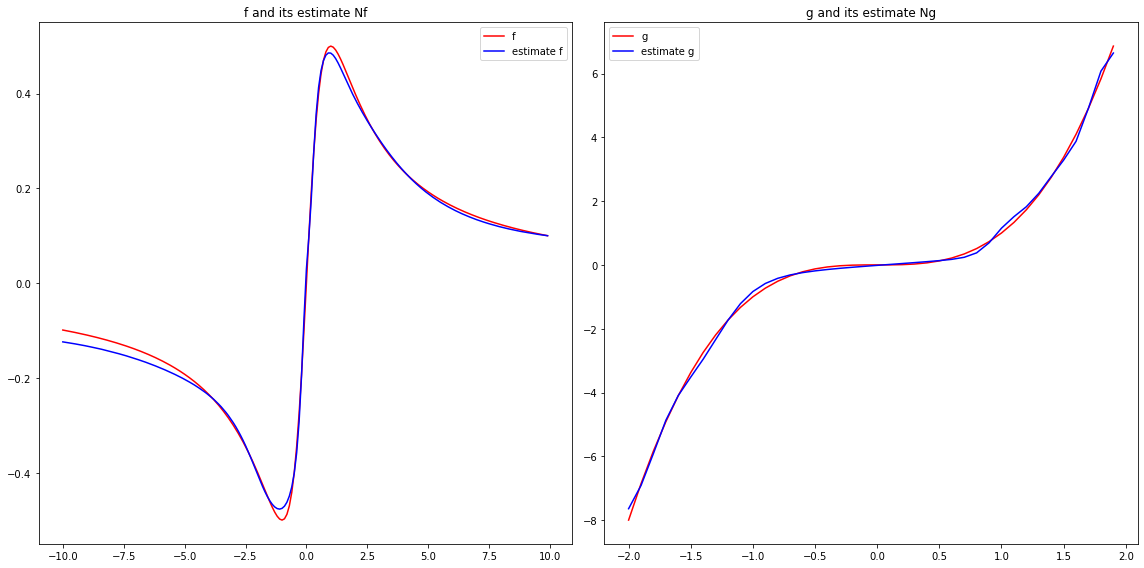

In [8]:
plt.figure(figsize=(16, 8))  

plt.subplot(1, 2, 1)
plt.plot(np.arange(-10, 10, distance_nf), f_data, 'red', label='f')
plt.plot(np.arange(-10, 10, distance_nf), output_nf, 'blue', label='estimate f')
plt.title('f and its estimate Nf')
plt.legend()

plt.subplot(1, 2, 2) 
plt.plot(np.arange(-2, 2, distance_ng), g_data, 'red', label='g')  
plt.plot(np.arange(-2, 2, distance_ng), output_ng, 'blue', label='estimate g')
plt.title('g and its estimate Ng')
plt.legend()

plt.tight_layout()
plt.savefig('./Images/Example_3_nf_ng_outputs.pdf')
plt.show()

# Merge

In [9]:
def u(k):
    return np.sin(2 * np.pi * k / 25) + np.sin(2 * np.pi * k / 10)

def calculate_y(y, u):
    return y / (1 + y**2) + u**3

num_steps = 100  
y_values = np.zeros(num_steps)
u_values = np.zeros(num_steps)
y_values[0] = 1  

for k in range(num_steps - 1):
    u_val = u(k)
    u_values[k] = u_val
    y_values[k + 1] = calculate_y(y_values[k], u_val)

In [10]:
predicted_y = np.zeros(num_steps)
predicted_y[0] = 1

for k in range(num_steps - 1):
    u_input = np.array(u_values[k]).reshape(1, 1)
    y_input = np.array(y_values[k]).reshape(1, 1)
    
    ng_output = model_Ng.test_model(u_input)[0]
    nf_output = model_Nf.test_model(y_input)[0]
    
    predicted_y[k+1] = ng_output + nf_output

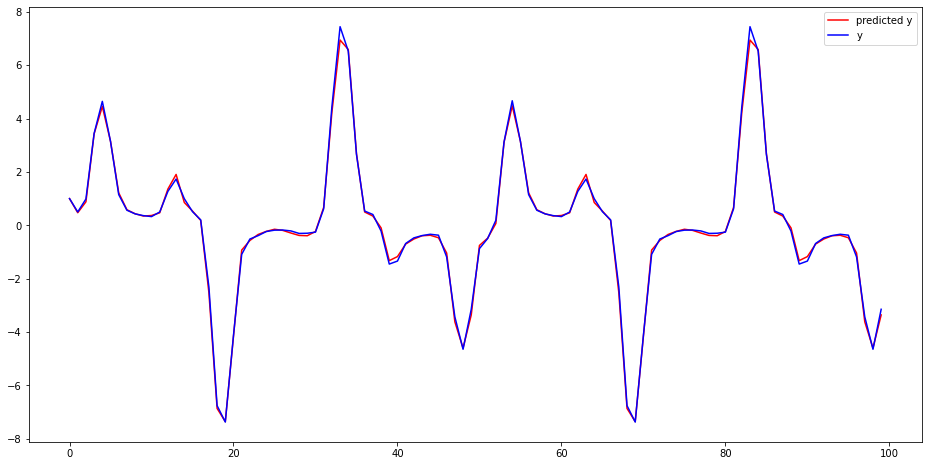

In [11]:
plt.figure(figsize=(16, 8))
plt.plot(np.arange(0, 100), predicted_y, 'red', label='predicted y')
plt.plot(np.arange(0, 100), y_values, 'blue', label='y')
plt.legend()
plt.savefig('./Images/Example_3_merged.pdf')
plt.show()